## Crime Rates in Pittsburgh Neighborhoods

Joshua Frank

I chose to analyze the Crime rates within the neiborhoods of Pittsburgh.

It is of my opinion that the safer the neighborhood, the better the quality of life will be. Threrefore I choise the metric of crim to see which neiborhoos had the least about of crime on average.

The first step of this process was to import pandas and clean up the data sheet from the Pittsburgh arcives.

In [1]:
import pandas as pd

data = pd.read_csv("crime.csv", index_col="INCIDENTNEIGHBORHOOD")
data.drop("_id", inplace=True, axis=1)
data.drop("PK", inplace=True, axis=1)
data.drop("CCR", inplace=True, axis=1)
data.drop("AGE", inplace=True, axis=1)
data.drop("GENDER", inplace=True, axis=1)
data.drop("RACE", inplace=True, axis=1)
data.drop("ARRESTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTZONE", inplace=True, axis=1)
data.drop("INCIDENTTRACT", inplace=True, axis=1)
data.drop("COUNCIL_DISTRICT", inplace=True, axis=1)
data.drop("PUBLIC_WORKS_DIVISION", inplace=True, axis=1)
data.drop("X", inplace=True, axis=1)
data.drop("Y", inplace=True, axis=1)
data.head(10)

,ARRESTTIME,OFFENSES
INCIDENTNEIGHBORHOOD,,
Bloomfield,2016-08-24T12:20:00,3929 Retail Theft.
Outside City,2016-08-03T14:55:00,13(a)(16) Possession of Controlled Substance
Westwood,2016-08-03T16:45:00,3929 Retail Theft.
East Allegheny,2016-08-05T02:36:00,5503 Disorderly Conduct. / 5505 Public Drunken...
Crafton Heights,2016-08-06T02:00:00,2702 Aggravated Assault. / 2705 Recklessy Enda...
Greenfield,2016-08-15T13:30:00,3929 Retail Theft.
Brookline,2016-08-16T13:00:00,2701 Simple Assault.
Regent Square,2016-08-16T04:25:00,2701 Simple Assault. / 5505 Public Drunkenness...
East Liberty,2016-08-29T17:55:00,903 Criminal Conspiracy. / 3701 Robbery.


## Data Analysis

I first chose the parameters for which crimes are the worst.

I decided on the top five options which were the greatest threats to a peaceful society.

-Retail theft
-Terroristic threats
-Simple Assult
-Robbery
-Burglory

In [8]:
# filter the data for top five crimes
specific_crimes = ['2701 Simple Assault.', '3502 Burglary.', '3701 Robbery.', '706 Terroristic Threats.', '3929 Retail Theft.']

crime_filter = data['OFFENSES'].isin(specific_crimes)

filtered_data = data[crime_filter]

print(filtered_data)

                               ARRESTTIME              OFFENSES
INCIDENTNEIGHBORHOOD                                           
Bloomfield            2016-08-24T12:20:00    3929 Retail Theft.
Westwood              2016-08-03T16:45:00    3929 Retail Theft.
Greenfield            2016-08-15T13:30:00    3929 Retail Theft.
Brookline             2016-08-16T13:00:00  2701 Simple Assault.
Carrick               2016-08-07T13:40:00  2701 Simple Assault.
...                                   ...                   ...
Overbrook             2023-08-27T14:30:00  2701 Simple Assault.
Shadyside             2023-08-26T13:27:00    3929 Retail Theft.
South Side Flats      2023-08-26T16:15:00    3929 Retail Theft.
East Liberty          2023-10-04T13:00:00    3929 Retail Theft.
Shadyside             2023-08-29T14:51:00    3929 Retail Theft.

[5783 rows x 2 columns]


This was a start but I than needed to group these neighborhoods and their crimes together into a more usable data structure

In [9]:
crime_counts = filtered_data.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='COUNT')

print(crime_counts)

    INCIDENTNEIGHBORHOOD              OFFENSES  COUNT
0       Allegheny Center  2701 Simple Assault.     26
1       Allegheny Center        3502 Burglary.      3
2       Allegheny Center         3701 Robbery.      6
3         Allegheny West  2701 Simple Assault.      6
4         Allegheny West        3502 Burglary.      4
..                   ...                   ...    ...
272             Westwood        3502 Burglary.      1
273             Westwood         3701 Robbery.      1
274             Westwood    3929 Retail Theft.      7
275              Windgap  2701 Simple Assault.      9
276              Windgap        3502 Burglary.      3

[277 rows x 3 columns]


Now that they are organized I used the matplot functions of panadas as well as the seaborn solution to give a plot of this data 

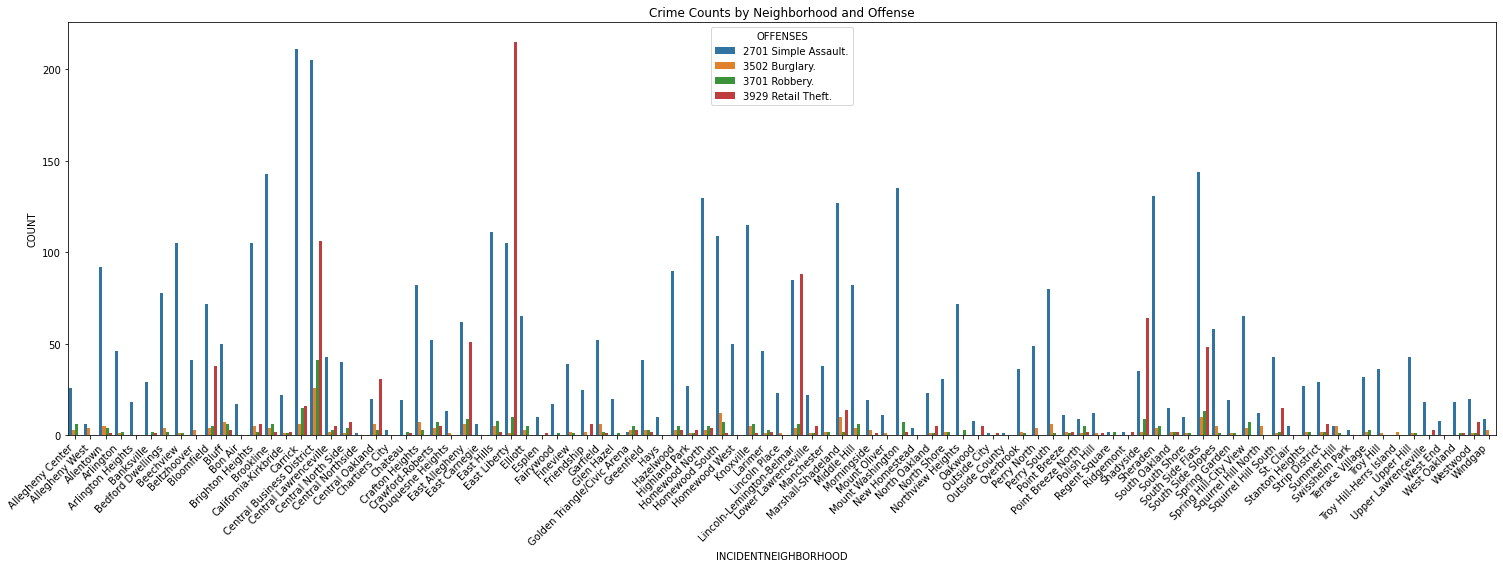

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(21, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='COUNT', hue='OFFENSES', data=crime_counts)
plt.title('Crime Counts by Neighborhood and Offense')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This paints a picture of the total crimes and their neighborhoods but lacks readability. I further filtered this down into total crimes for each neighborhood

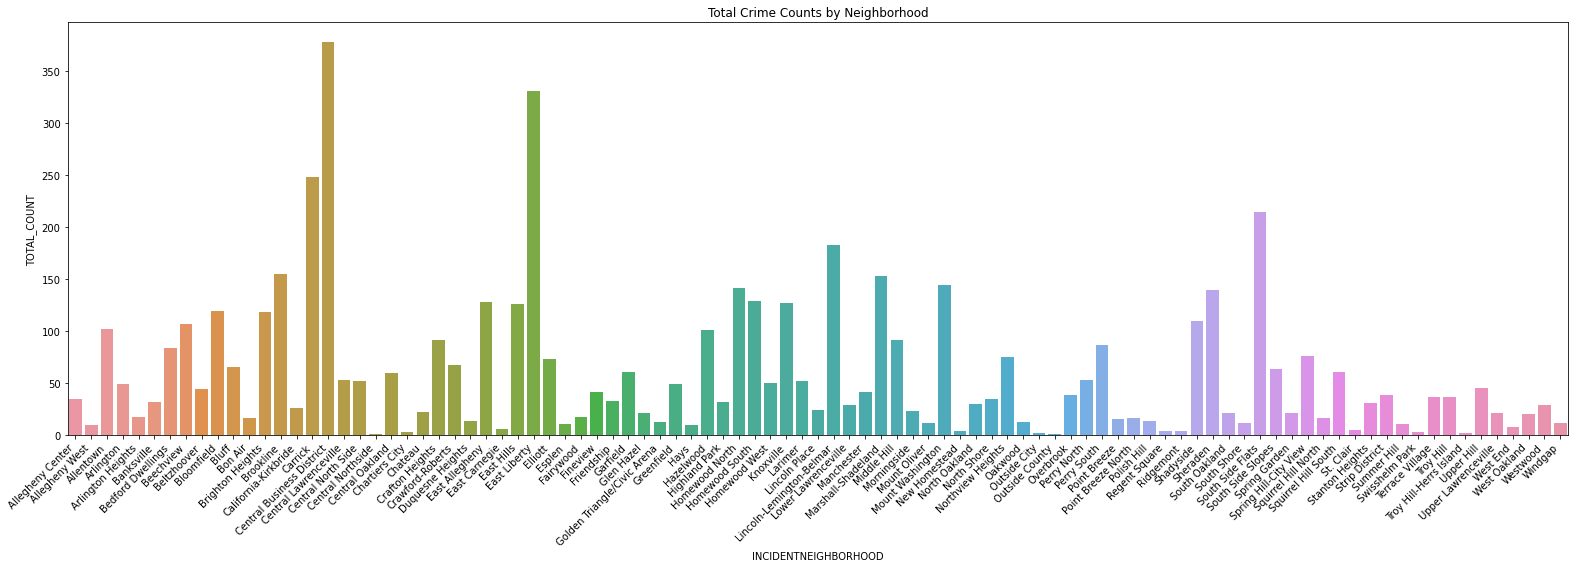

In [23]:
total_crime_counts = filtered_data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='TOTAL_COUNT')
plt.figure(figsize=(22, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=total_crime_counts)
plt.title('Total Crime Counts by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Still not pretty but we are close.
I decided to narrow the seach to the top five least crime riden neighborhoods for these top 5 choices and compare them below.

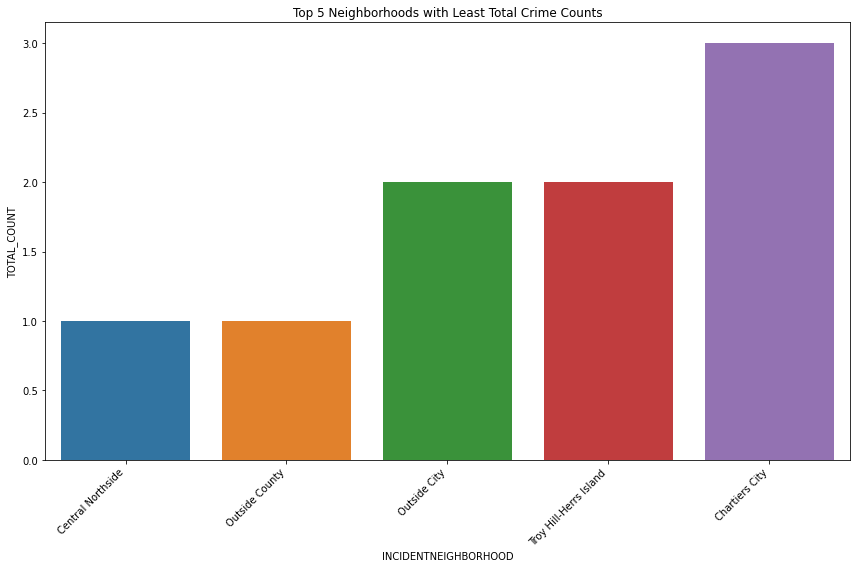

In [15]:
# Sorted by total crime counts in ascending order and selected the top 5
top5_least_crime_neighborhoods = total_crime_counts.sort_values(by='TOTAL_COUNT').head(5)

# Set up the plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=top5_least_crime_neighborhoods)
plt.title('Top 5 Neighborhoods with Least Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion

Central Northside and Outside County tied on total counts of crimes reported.

I decided to find what specific crime these two areas reported and found this below

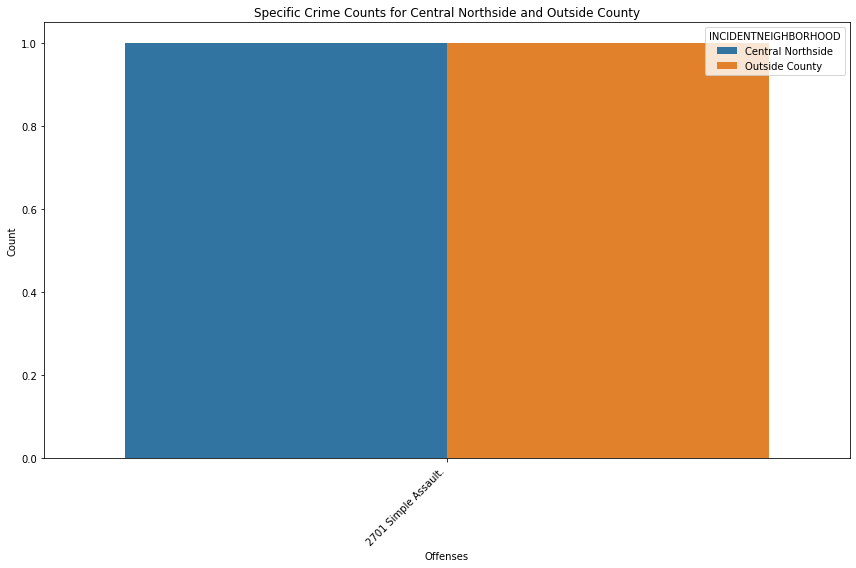

In [40]:

# Specify the neighborhoods to visualize
neighborhoods_to_visualize = ['Central Northside', 'Outside County']

# Filtered data for the specified neighborhoods and offenses
neighborhood_data = filtered_data[filtered_data.index.isin(neighborhoods_to_visualize)]

# Group by 'INCIDENTNEIGHBORHOOD' and 'OFFENSES', then sum the counts
offense_totals = neighborhood_data.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='COUNT')

# Set up the bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='OFFENSES', y='COUNT', hue='INCIDENTNEIGHBORHOOD', data=offense_totals)
plt.title('Specific Crime Counts for Central Northside and Outside County')
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Overall it appears there is a dead tie in my search for the safest neighborhood. I choose Central Northside as the overall safest neighborhod for my portion. As it aligns closly with safest walkability in Pittsburgh. 